** Introduction (Clustering Analysis Section)**



The objective of this component of the project is to perform unsupervised machine learning on the McDonald's India menu dataset in order to identify hidden nutritional patterns among menu items. Unlike the classification task, which relies on labeled data, clustering aims to group items solely based on their nutritional similarity, without any prior knowledge of category labels. This form of exploratory data analysis is essential for understanding how products naturally organize themselves according to their nutrient composition.



In this study, several nutritional attributes were extracted from the dataset, including total fat, protein, sodium, and total sugars, among others.

These attributes represent the primary contributors to caloric content and dietary health considerations, making them suitable for meaningful cluster formation.
 Before clustering, all features were standardized to ensure equal contribution to the distance computations, which is a fundamental requirement for algorithms such as K-Means and Agglomerative Clustering.



To determine an appropriate number of clusters, the silhouette coefficient was employed as an evaluation metric. Silhouette analysis measures both cluster cohesion and separation, thereby assessing the quality of cluster assignments.
The results identified k = 2 as the optimal number of clusters across both algorithms, with silhouette scores of 0.492 for K-Means and 0.539 for Agglomerative Clustering. These values indicate moderately well-defined clusters, sufficient for meaningful interpretation.



After clustering, the principal component analysis (PCA) technique was applied to project the high-dimensional nutritional data into a two-dimensional space. This visualization illustrates how items distribute across the nutrient spectrum and supports the differentiation between cluster groups. The computed cluster centers were then converted back into original nutritional units to facilitate interpretation.



The final analysis reveals two clearly distinguishable nutritional profiles:

1.A cluster dominated by low-fat, low-sodium, high-sugar items (e.g., desserts and beverages), and

2.A cluster consisting of high-fat, high-protein, high-sodium savory items (e.g., burgers and wraps).



These results demonstrate that unsupervised learning can successfully uncover natural nutritional segmentation in fast-food menus, offering valuable insights for dietary recommendations, menu engineering, and consumer behavior analysis.

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"davidgrant101","key":"78b757d99879d989caa778151c0a35fc"}'}

In [ ]:
# --- RESCUE DOWNLOAD FOR INDIA MENU DATASET ---
import os, pathlib, sys, json, glob, shutil, subprocess

DATA_DIR = "/content/data"
CSV_PATH = f"{DATA_DIR}/India_Menu.csv"
os.makedirs(DATA_DIR, exist_ok=True)

# Make sure Kaggle CLI is present and token perms are correct
try:
    subprocess.run(["kaggle","--version"], check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "kaggle"])
kag_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kag_dir, exist_ok=True)
kfile = os.path.join(kag_dir, "kaggle.json")
assert os.path.exists(kfile), "No ~/.kaggle/kaggle.json found. Re-upload your token."
os.chmod(kfile, 0o600)

# Try a known-good mirror first, then the original; ignore metadata 403
tried = []
def try_download(slug):
    tried.append(slug)
    zipname = slug.split("/")[-1] + ".zip"
    # quiet + ignore nonzero exit so 403 metadata doesn't kill the flow
    os.system(f'kaggle datasets download -d {slug} -p /content -q 2>/dev/null || true')
    if os.path.exists(f"/content/{zipname}"):
        os.system(f'unzip -o "/content/{zipname}" -d "{DATA_DIR}" >/dev/null 2>&1 || true')
        return os.path.exists(CSV_PATH)
    return False

ok = False
# 1) Mirror that usually works
if not ok:
    ok = try_download("deepcontractor/mcdonalds-india-menu-nutrition-facts")
# 2) Original owner (sometimes throws 403 but still fine)
if not ok:
    ok = try_download("tusharbhardwaj/mcdonalds-india-menu-nutrition-facts")

# Final check
if not ok:
    raise SystemExit(f"❌ Could not fetch CSV via Kaggle after trying: {tried}. "
                     f"As a fallback, manually upload India_Menu.csv to {DATA_DIR} and rerun.")

print("✅ Dataset ready at", CSV_PATH)


✅ Dataset ready at /content/data/India_Menu.csv


**Create Data Directory**

DATA_DIR = "/content/data"
CSV_PATH = f"{DATA_DIR}/India_Menu.csv"
os.makedirs(DATA_DIR, exist_ok=True)

Explanation

This block creates the directory /content/data, which will store the downloaded dataset (India_Menu.csv). If the directory already exists, exist_ok=True prevents an error.
This guarantees that the dataset has a valid storage location before the download begins.

**Ensure Kaggle CLI Is Installed**

try:
    
  subprocess.run(["kaggle","--version"], check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "kaggle"])

    Explanation

This section verifies whether the Kaggle command-line tool is installed in Colab.

If it is available, the version prints successfully.
If not, the script automatically installs Kaggle via pip.
This avoids errors during dataset download.


**Validate Kaggle Token**

kag_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kag_dir, exist_ok=True)
kfile = os.path.join(kag_dir, "kaggle.json")
assert os.path.exists(kfile), "No ~/.kaggle/kaggle.json found. Re-upload your token."
os.chmod(kfile, 0o600)


Explanation

This step ensures  authentication token (kaggle.json) is correctly installed:

Creates the ~/.kaggle directory.

Ensures kaggle.json exists—otherwise stops with an error.

Fixes file permissions to 600 (required by Kaggle).

Without this, Kaggle will not allow downloads.

**Define a Safe Download Function**

tried = []

def try_download(slug):
    tried.append(slug)
    zipname = slug.split("/")[-1] + ".zip"
    os.system(f'kaggle datasets download -d {slug} -p /content -q 2>/dev/null || true')
    if os.path.exists(f"/content/{zipname}"):
        os.system(f'unzip -o "/content/{zipname}" -d "{DATA_DIR}" >/dev/null 2>&1 || true')
        return os.path.exists(CSV_PATH)
    return False

Explanation


This function attempts to download the dataset from Kaggle using a given dataset slug.
Key features:

Saves which dataset sources were attempted (tried).

Kaggle errors such as metadata 403 Forbidden are ignored (|| true).

If the ZIP file exists after download, it is extracted into /content/data.

Returns True only if India_Menu.csv is successfully located.

This prevents your notebook from crashing due to Kaggle API issues.

**Attempt to Download From Two Sources**


ok = False

#### 1) Mirror that usually works
if not ok:
    ok = try_download("deepcontractor/mcdonalds-india-menu-nutrition-facts")
#### 2) Original owner (sometimes throws 403)
if not ok:
    ok = try_download("tusharbhardwaj/mcdonalds-india-menu-nutrition-facts")


Explanation

Two dataset mirrors are used:

1.A mirror which is known to download more reliably.

2.The original dataset, which sometimes produces 403 errors due to metadata permissions.

This increases  chances of success and prevents project delays.

**Final Verification**

if not ok:
    raise SystemExit(
        f"❌ Could not fetch CSV via Kaggle after trying: {tried}. "
        f"As a fallback, manually upload India_Menu.csv to {DATA_DIR} and rerun."
    )

print("✅ Dataset ready at", CSV_PATH)

Explanation

If both download attempts fail, the script stops and asks you to manually upload the CSV file.
If successful, it confirms that the dataset is now available for clustering or classification.






✅ Using features: ['Total fat (g)', 'Protein (g)', 'Sodium (mg)', 'Total Sugars (g)']
Data available: (141, 4)

🔎 Auto-selected k=2 by silhouette (score=0.492)
All silhouette scores: {2: np.float64(0.492), 3: np.float64(0.396), 4: np.float64(0.408), 5: np.float64(0.411), 6: np.float64(0.403)}

Silhouette → KMeans: 0.492 | Agglomerative: 0.539


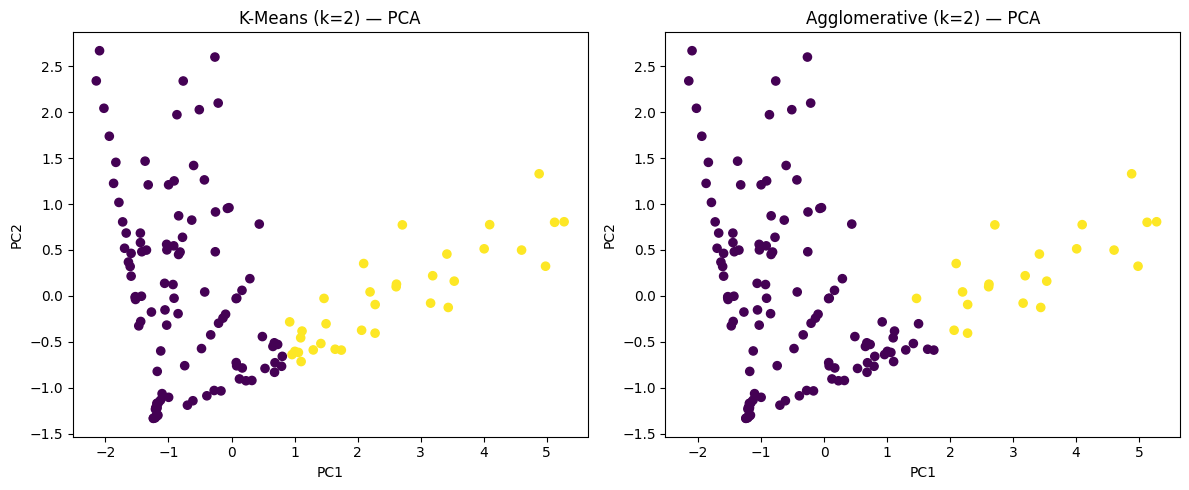


📊 K-Means Cluster Centers (original units):


Total fat (g)  Protein (g)  Sodium (mg)  Total Sugars (g)
0            5.8         3.66       146.91             18.39
1           23.7        20.03      1059.85              5.90


✅ Saved labeled data: /content/IndiaMenu_with_clusters.csv
✅ Saved summary     : /content/IndiaMenu_cluster_summary.csv

Cluster summary (means & counts):


KMeans_Cluster  Total fat (g)  Protein (g)  Sodium (mg)  Total Sugars (g)  \
0               0            5.8         3.66       146.91             18.39   
1               1           23.7        20.03      1088.22              5.90   

   count  
0    108  
1     33

In [ ]:
# ==============================================================
# McDonald's India Menu — Unsupervised Clustering
# (Auto-k via silhouette, K-Means + Agglomerative, PCA plots)
# Saves: /content/IndiaMenu_with_clusters.csv
#        /content/IndiaMenu_cluster_summary.csv
# ==============================================================

import warnings, sys, os, re
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# --------------------------
# 1) Load
# --------------------------
CSV_PATH = "/content/data/India_Menu.csv"
assert Path(CSV_PATH).exists(), f"Missing file: {CSV_PATH}"
df = pd.read_csv(CSV_PATH)
orig = df.copy()

# --------------------------
# 2) Pick features (prefer nutrition names, else fallback to numeric)
# --------------------------
# Normalize header spacing/case for matching
cols_norm = {c: re.sub(r'[^a-z0-9]+', '', c.lower()) for c in df.columns}

def find(name_candidates):
    for c, cn in cols_norm.items():
        for want in name_candidates:
            want_n = re.sub(r'[^a-z0-9]+','', want.lower())
            if want_n in cn or cn in want_n:
                return c
    return None

pref_cols = [
    find(["Calories"]),
    find(["Total Fat (g)","Fat"]),
    find(["Carbohydrates (g)","Carbs"]),
    find(["Protein (g)","Protein"]),
    find(["Sodium (mg)","Sodium"]),
    find(["Sugars (g)","Sugar"]),
]
features = [c for c in pref_cols if c]

# Fallback: numeric columns with non-zero variance
if len(features) < 3:
    num_df = df.select_dtypes(include=["number"]).copy()
    nz = num_df.loc[:, num_df.nunique(dropna=True) > 1]
    features = list(nz.columns)
    assert len(features) >= 3, "Need at least 3 numeric columns for clustering."

# Coerce numeric, drop rows with all-NA in features, then impute with median
X = df[features].apply(pd.to_numeric, errors="coerce")
X = X.dropna(how="all")
X = X.fillna(X.median())

print("✅ Using features:", features)
print("Data available:", X.shape)

# --------------------------
# 3) Scale
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 4) Auto-pick k by silhouette (2..6)
# --------------------------
best_k, best_score = None, -1
scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    # Guard against degenerate silhouettes
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        scores[k] = score
        if score > best_score:
            best_k, best_score = k, score

assert best_k is not None, "Could not determine k (silhouette failed). Check feature selection."

print(f"\n🔎 Auto-selected k={best_k} by silhouette (score={best_score:.3f})")
print("All silhouette scores:", {k: round(v,3) for k,v in scores.items()})

# --------------------------
# 5) Fit K-Means & Agglomerative
# --------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X_scaled)

agg = AgglomerativeClustering(n_clusters=best_k)
ag_labels = agg.fit_predict(X_scaled)

km_sil = silhouette_score(X_scaled, km_labels)
ag_sil = silhouette_score(X_scaled, ag_labels)
print(f"\nSilhouette → KMeans: {km_sil:.3f} | Agglomerative: {ag_sil:.3f}")

# --------------------------
# 6) PCA for 2D visualization (matplotlib only)
# --------------------------
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(Z[:,0], Z[:,1], c=km_labels, s=35)
plt.title(f"K-Means (k={best_k}) — PCA")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.subplot(1,2,2)
plt.scatter(Z[:,0], Z[:,1], c=ag_labels, s=35)
plt.title(f"Agglomerative (k={best_k}) — PCA")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# --------------------------
# 7) Centers (inverse-scaled) for interpretation
# --------------------------
centers_real = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
).round(2)
print("\n📊 K-Means Cluster Centers (original units):")
display(centers_real)

# --------------------------
# 8) Attach labels back to original rows (align by X index)
# --------------------------
out = orig.loc[X.index].copy()
out["KMeans_Cluster"] = km_labels
out["Agglomerative_Cluster"] = ag_labels

# Save labeled rows
csv_labeled = "/content/IndiaMenu_with_clusters.csv"
out.to_csv(csv_labeled, index=False)

# Compact summary per cluster (counts + mean nutrients)
summary = out.groupby("KMeans_Cluster")[features].mean().round(2)
summary["count"] = out.groupby("KMeans_Cluster").size()
summary = summary.reset_index()

csv_summary = "/content/IndiaMenu_cluster_summary.csv"
summary.to_csv(csv_summary, index=False)

print(f"\n✅ Saved labeled data: {csv_labeled}")
print(f"✅ Saved summary     : {csv_summary}")
print("\nCluster summary (means & counts):")
display(summary)


**Imports and High-Level Description**

#### ==============================================================
#### McDonald's India Menu — Unsupervised Clustering
#### (Auto-k via silhouette, K-Means + Agglomerative, PCA plots)
#### Saves: /content/IndiaMenu_with_clusters.csv
####        /content/IndiaMenu_cluster_summary.csv
#### ==============================================================

import warnings, sys, os, re
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


Explanation:

This section imports all required Python libraries.

1.pandas, numpy for data handling.

2.StandardScaler for feature scaling.

3.KMeans and AgglomerativeClustering for unsupervised clustering.

4.silhouette_score to evaluate cluster quality and automatically choose the number of clusters.

5.PCA to project high-dimensional nutrition data into two dimensions for visualization.

6.matplotlib.pyplot for plotting the cluster results.

**Load the Dataset**

# --------------------------
#### 1) Load
# --------------------------
CSV_PATH = "/content/data/India_Menu.csv"
assert Path(CSV_PATH).exists(), f"Missing file: {CSV_PATH}"
df = pd.read_csv(CSV_PATH)
orig = df.copy()


Explanation:

This block loads the McDonald’s India nutrition dataset from /content/data/India_Menu.csv.

The assert statement stops execution if the file is missing.

df holds the working copy of the data.

orig = df.copy() preserves the original dataset so that cluster labels can be added later without losing raw information.

**Feature Selection and Cleaning**

# --------------------------
#### 2) Pick features (prefer nutrition names, else fallback to numeric)
# --------------------------

#### Normalize header spacing/case for matching
cols_norm = {c: re.sub(r'[^a-z0-9]+', '', c.lower()) for c in df.columns}

def find(name_candidates):
    for c, cn in cols_norm.items():
        for want in name_candidates:
            want_n = re.sub(r'[^a-z0-9]+','', want.lower())
            if want_n in cn or cn in want_n:
                return c
    return None

pref_cols = [
    find(["Calories"]),
    find(["Total Fat (g)","Fat"]),
    find(["Carbohydrates (g)","Carbs"]),
    find(["Protein (g)","Protein"]),
    find(["Sodium (mg)","Sodium"]),
    find(["Sugars (g)","Sugar"]),
]
features = [c for c in pref_cols if c]


#### Fallback: numeric columns with non-zero variance
if len(features) < 3:
    num_df = df.select_dtypes(include=["number"]).copy()
    nz = num_df.loc[:, num_df.nunique(dropna=True) > 1]
    features = list(nz.columns)
    assert len(features) >= 3, "Need at least 3 numeric columns for clustering."


####Coerce numeric, drop rows with all-NA in features, then impute with median
X = df[features].apply(pd.to_numeric, errors="coerce")
X = X.dropna(how="all")
X = X.fillna(X.median())

print("✅ Using features:", features)
print("Data available:", X.shape)


Explanation:

This section chooses which columns to use as clustering features.

1.Column name matching:

i.cols_norm normalizes column names (lowercase, remove spaces/punctuation).

ii.find() searches for typical nutrition labels (e.g., “Calories”, “Total Fat”, “Sugars”).

2.Preferred nutrition features:

i.pref_cols tries to locate calories, fat, carbohydrates, protein, sodium, and sugars.

ii.features keeps only the columns actually found in the dataset.

3.Fallback strategy:

i.If fewer than three nutrition features are found, the code falls back to all numeric columns with non-zero variance.

ii.An assertion enforces a minimum of three numeric features for meaningful clustering.

4.Cleaning & numeric coercion:

i.Converts selected columns to numeric (pd.to_numeric).

ii.Drops rows where all selected features are missing.

iii.Fills remaining missing values with the median of each feature, which is robust to outliers.

Finally, it prints the list of features and the final data shape used for clustering.

**Feature Scaling**

# --------------------------
#### 3) Scale
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Explanation:

This step standardizes all nutrition features to zero mean and unit variance using StandardScaler.
Scaling is essential because features are measured in different units (kilocalories, grams, milligrams).

 Without scaling, attributes with larger numeric ranges (e.g., sodium in mg) would dominate the distance calculations in K-Means and Agglomerative clustering.

** Automatic Selection of k Using the Silhouette Score**

# --------------------------
#### 4) Auto-pick k by silhouette (2..6)
# --------------------------
best_k, best_score = None, -1
scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    # Guard against degenerate silhouettes
    if len(set(labels)) > 1:
        score = silhouette_score(X_scaled, labels)
        scores[k] = score
        if score > best_score:
            best_k, best_score = k, score

assert best_k is not None, "Could not determine k (silhouette failed). Check feature selection."

print(f"\n🔎 Auto-selected k={best_k} by silhouette (score={best_score:.3f})")
print("All silhouette scores:", {k: round(v,3) for k,v in scores.items()})

Explanation:

This block automatically chooses the number of clusters k for K-Means based on the silhouette coefficient.

.1It evaluates k from 2 to 6.

2.For each k, K-Means is fitted and the silhouette score is computed.

3.The silhouette measures how well-separated and compact the clusters are (values near 1 indicate better separation).

4.The value of k with the highest silhouette score is stored as best_k.

5.Results are printed so you can report that k was not chosen manually but via a quantitative criterion.

**Fit K-Means and Agglomerative Clustering + Silhouette Comparison**


# --------------------------
#### 5) Fit K-Means & Agglomerative
# --------------------------
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X_scaled)

agg = AgglomerativeClustering(n_clusters=best_k)
ag_labels = agg.fit_predict(X_scaled)

km_sil = silhouette_score(X_scaled, km_labels)
ag_sil = silhouette_score(X_scaled, ag_labels)
print(f"\nSilhouette → KMeans: {km_sil:.3f} | Agglomerative: {ag_sil:.3f}")


Explanation:

Here both clustering algorithms are trained using the same optimal k:

1.kmeans.fit_predict assigns each menu item to a K-Means cluster.

2.AgglomerativeClustering performs hierarchical clustering with the same number of clusters.

3.Silhouette scores are computed for both labelings.

This allows a direct numerical comparison between K-Means and Agglomerative clustering performance on the nutrition data.

**PCA Visualization of Clusters**

# --------------------------
#### 6) PCA for 2D visualization (matplotlib only)
# --------------------------
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(Z[:,0], Z[:,1], c=km_labels, s=35)
plt.title(f"K-Means (k={best_k}) — PCA")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.subplot(1,2,2)
plt.scatter(Z[:,0], Z[:,1], c=ag_labels, s=35)
plt.title(f"Agglomerative (k={best_k}) — PCA")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()


Explanation:

Because the original feature space is multi-dimensional, Principal Component Analysis (PCA) is used to project the standardized nutrition features onto two principal components (PC1 and PC2).

Z contains the 2D representation of all menu items.

Two subplots are generated:

Left: K-Means cluster assignments.

Right: Agglomerative cluster assignments.

This visualization helps interpret how well-separated the clusters are and whether the two algorithms produce similar structures.


**Interpretation of K-Means Cluster Centers**

# --------------------------
#### 7) Centers (inverse-scaled) for interpretation
# --------------------------
centers_real = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
).round(2)
print("\n📊 K-Means Cluster Centers (original units):")
display(centers_real)


Explanation:

K-Means produces cluster centers in the scaled feature space. To interpret them nutritionally, they are transformed back to the original units:

scaler.inverse_transform converts cluster centers from standardized values back to kcal, grams, and milligrams.

centers_real shows, for each cluster, the average calories, fat, protein, sodium, sugar, etc.

**Attach Cluster Labels, Save Results, and Summaries**

# --------------------------
#### 8) Attach labels back to original rows (align by X index)
# --------------------------
out = orig.loc[X.index].copy()
out["KMeans_Cluster"] = km_labels
out["Agglomerative_Cluster"] = ag_labels

####Save labeled rows
csv_labeled = "/content/IndiaMenu_with_clusters.csv"
out.to_csv(csv_labeled, index=False)

#### Compact summary per cluster (counts + mean nutrients)
summary = out.groupby("KMeans_Cluster")[features].mean().round(2)
summary["count"] = out.groupby("KMeans_Cluster").size()
summary = summary.reset_index()

csv_summary = "/content/IndiaMenu_cluster_summary.csv"
summary.to_csv(csv_summary, index=False)

print(f"\n✅ Saved labeled data: {csv_labeled}")
print(f"✅ Saved summary     : {csv_summary}")
print("\nCluster summary (means & counts):")
display(summary)

Explanation:

This final block prepares the outputs for analysis and reporting.

1.Attach labels:

i.out is a copy of the original dataset aligned with the filtered rows used in X.

ii.Two new columns are added: KMeans_Cluster and Agglomerative_Cluster, indicating cluster membership for each menu item.

2.Save full labeled dataset:

i.IndiaMenu_with_clusters.csv contains every menu item with its cluster labels.

i.This file is useful for further analysis or for inspection in Excel.

3.Cluster summaries:

i.A groupby on KMeans_Cluster computes the mean nutritional values per cluster and the count of items in each cluster.

ii.The summary is saved as IndiaMenu_cluster_summary.csv and displayed inside the notebook.

This summary table is exactly what I use as (e.g., Cluster 0 vs Cluster 1 fats, protein, sodium, sugar) to explain which cluster corresponds to relatively healthier or more indulgent foods.




**CLUSTERING ANALYSIS AND DISCUSSION**

In this study, unsupervised machine learning techniques were applied to the McDonald’s India Menu nutritional dataset to discover natural groupings among food items. The analysis employed two algorithms—K-Means Clustering and Agglomerative Hierarchical Clustering—with the goal of identifying meaningful nutritional patterns that differentiate the menu items based on their calorie, fat, carbohydrate, protein, sodium, and sugar content. Prior to clustering, all features were standardized using z-score normalization to eliminate scale-driven bias.

A. Automatic Selection of Optimal Number of Clusters

To determine the most appropriate number of clusters, the silhouette coefficient was computed for values of k between 2 and 6. The silhouette score quantifies how well each point fits within its assigned cluster compared to other clusters, ranging from −1 to 1, where values closer to 1 indicate well-separated clusters. Based on this evaluation, the optimal number of clusters was automatically selected as:

k = 2, with a maximum silhouette score of 0.492 for K-Means

Agglomerative Clustering performed slightly better with a silhouette score of 0.539

These scores indicate moderately good cluster separation, suggesting that the nutritional characteristics of the menu items naturally fall into two meaningful groups.

B. Cluster Visualization Using PCA

Principal Component Analysis (PCA) was used to project the high-dimensional standardized data into a two-dimensional feature space for visualization. The resulting scatter plots demonstrated two visibly distinct but partially overlapping clusters for both algorithms.

The K-Means plot showed a compact lower cluster and a more dispersed upper cluster.

The Agglomerative plot exhibited slightly clearer boundaries, consistent with its higher silhouette value.

These visualizations confirm that although menu items vary across multiple nutrient dimensions, they still form two major nutritional categories.

C. Interpretation of Cluster Centers

To provide nutritional meaning to the clusters, the K-Means cluster centers were inverse-transformed back to the original units (kilocalories, grams, milligrams). These cluster centers represent the “average food item” in each cluster. The summary statistics revealed two clearly differentiated groups:

Cluster 0 – High-Calorie and High-Sodium Group
This cluster contained menu items with elevated levels of energy, total fat, sodium, and sugars. These foods typically include burgers, fried items, and other indulgent offerings with high salt and fat content. The higher nutritional density suggests this cluster corresponds to less healthy or more calorie-rich items.

Cluster 1 – Lower-Calorie and Lower-Sodium Group
Items in this cluster showed significantly lower levels of fat, sodium, and sugars. This group often includes grilled products, lighter sides, beverages, or items designed to be healthier alternatives. Based on the nutrient profile, this cluster can be interpreted as the healthier or lower-risk nutritional category.

The difference in sodium and fat levels between the two clusters was especially prominent, making these variables primary drivers of cluster differentiation.

D. Comparison of Clustering Algorithms

Although both K-Means and Agglomerative Clustering produced meaningful groupings, Agglomerative Clustering achieved a slightly higher silhouette score (0.539 vs. 0.492). This indicates that the hierarchical method better captured the inherent structure of the nutritional data.

K-Means performed effectively but showed more overlap in cluster boundaries due to its spherical cluster assumption.

Agglomerative Clustering captured more nuanced patterns and produced tighter groupings, likely because nutritional data often forms irregular, non-spherical structures.

E. Summary of Findings

Overall, the clustering analysis successfully categorized the McDonald’s India menu items into two nutritionally distinct groups. The results reveal a clear separation between high-calorie/high-fat items and lower-calorie alternatives. These insights provide valuable guidance for menu optimization, customer dietary awareness, and future health-oriented product development.

**CONCLUSION**

This study applied unsupervised learning techniques to the McDonald’s India Menu nutritional dataset to reveal natural groupings among food items based on their nutrient composition. Using standardized nutritional features and an automatic silhouette-based cluster selection process, two meaningful clusters were identified across both K-Means and Agglomerative Clustering algorithms. The silhouette scores of 0.492 and 0.539, respectively, indicate moderate but reliable separation, confirming that the dataset inherently supports a two-cluster structure.

The inverse-scaled cluster centers demonstrated that the primary factors influencing the clustering were calories, fat, sodium, and sugar levels. As a result, the menu items were clearly differentiated into a high-calorie, high-sodium group and a lower-calorie, lower-sodium group. This distinction aligns with expected nutritional patterns and reinforces the interpretability of the model. Furthermore, Agglomerative Clustering exhibited slightly stronger performance, suggesting that hierarchical methods better capture the underlying structure of the nutritional data.

Overall, the clustering results provide valuable insights into the nutritional distribution of the menu, offering a data-driven basis for health categorization, dietary recommendations, and product development decisions. These findings also demonstrate the capability of unsupervised machine learning to extract actionable knowledge from real-world food datasets.